In [16]:
# load the libraries
import os
import pandas as pd
import numpy as np 
# load the datasets
# we are going to load using the data frames
df = pd.read_csv('data.csv')
# df2 = pd.read_csv('Sales.csv')

In [17]:
# display the first few rows of the data set
df.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
# Data preprocessing
# Data cleaning
# 1 Empty values cell that has no data
# 2 Wrong formats    30/09/2098  30092098
# 3 Wrong data       Age 23     -23
# 4 Duplicates       Record repeating its self


In [18]:
# Empty values
# check for empty values

print(df.isnull().sum()) 

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [19]:
# checking for wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [8]:
# check for non numeric values in the columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df1[col], errors='coerce').notnull().all():
        print(f"Column '{col}' contains non-numeric values.")

Column 'Calories' contains non-numeric values.


In [13]:
# wrong data
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df1[col]< 0).any():
        print(f"Column '{col}' contains negative values.")

In [23]:
# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("The dataframe contains duplicates.")
    print(df[duplicates])
else:
    print("The dataframe does not contain duplicates.")
    
# we only remove duplicates in rows

The dataframe contains duplicates.
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [ ]:
# recommendation
# 1. Handle empty values (fill)
# 2. Convert wrong formats
# 3. Correct wrong data
# 4. Remove duplicates in rows not columns

In [27]:
# Fill empty values with mean for numeric columns
# loop through the columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    # fill in with the mean
    df[col].fillna(df1[col].mean(), inplace=True)

NameError: name 'df1' is not defined

In [28]:
df.head(30)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [29]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [30]:
# EDA Exploratory Data Analysis
# checks the shape of the data set
print("The shape of the data set is :", df.shape)

The shape of the data set is : (169, 4)


In [31]:
# The summary of the statistics of the data set
print("the summary is")
print(df.describe())

the summary is
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [10]:
# Data visualization 
# 1. Histograms
# 2. Scatter plots
# 3. Correlation matrix 

# libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Histogram showing Pulse')

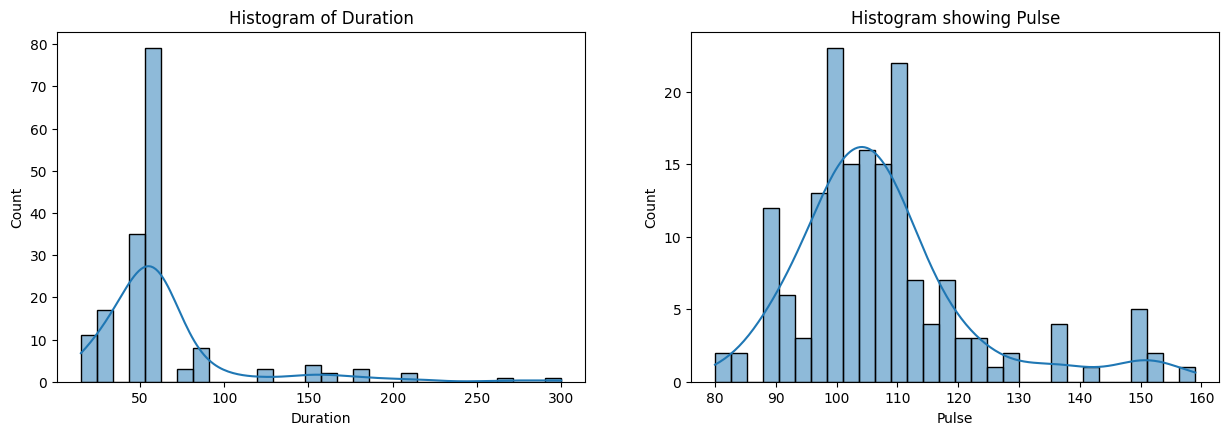

In [33]:
# Histogram of duration
# set up the figure size
plt.figure(figsize=(15, 10))

# Histogram of Duration
plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Histogram of Duration')

# Histogram of Pulse
plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.title('Histogram showing Pulse')





Text(0.5, 1.0, 'Pulse vs Calories')

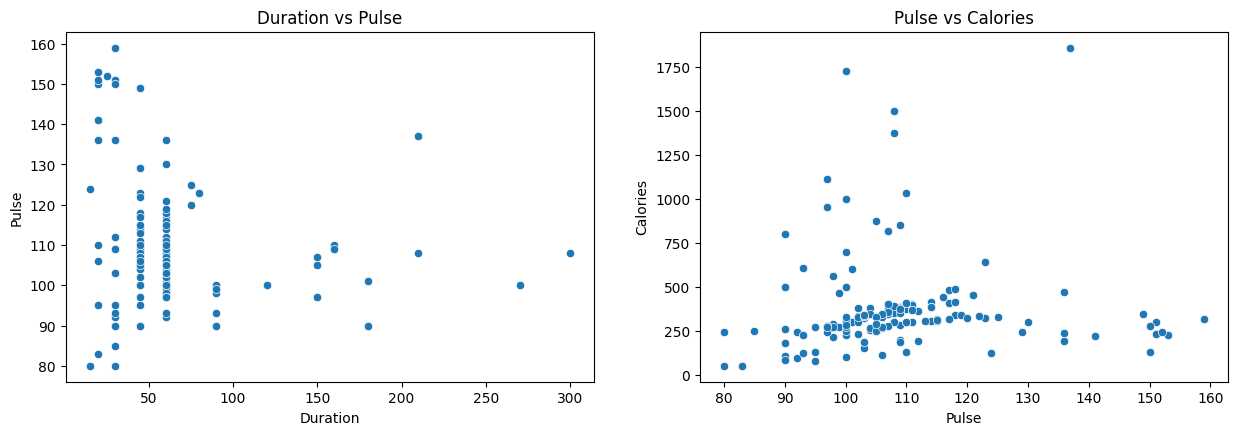

In [34]:
# scatter plot for duration and pulse

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Duration vs Pulse')

# Scatter plot for Pulse
plt.subplot(2, 2, 2)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')

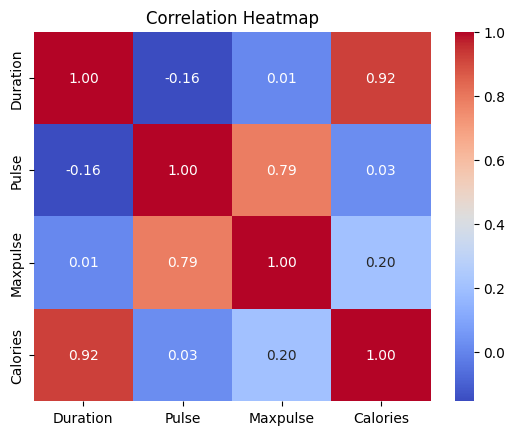

In [36]:
# Correlation heatmap
# relationship between the variables

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Histogram showing Calories')

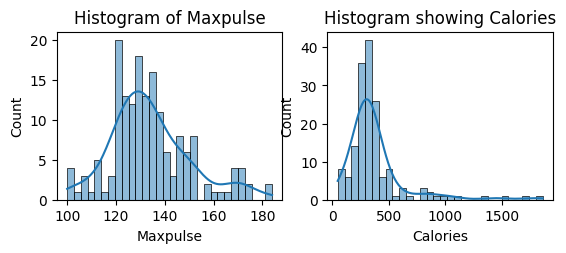

In [37]:
# Histogram of Maxpulse
plt.subplot(2, 2, 1)
sns.histplot(df['Maxpulse'], bins=30, kde=True)
plt.title('Histogram of Maxpulse')

# Histogram of Calories
plt.subplot(2, 2, 2)
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Histogram showing Calories')


Text(0.5, 1.0, 'Calories vs Maxpulse')

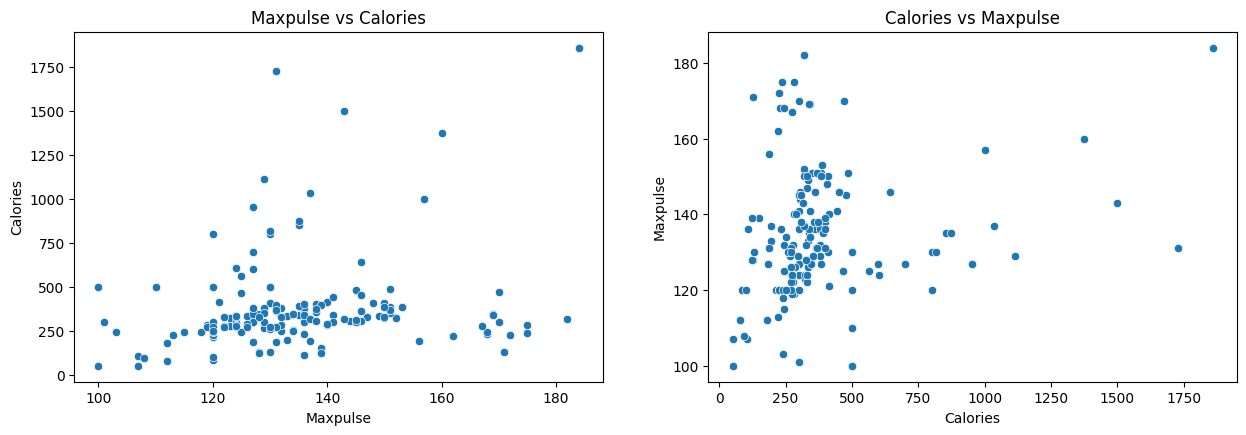

In [38]:
# scatter plot for Maxpulse and Calories

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Maxpulse', y='Calories', data=df)
plt.title('Maxpulse vs Calories')

# Scatter plot for Calories
plt.subplot(2, 2, 2)
sns.scatterplot(x='Calories', y='Maxpulse', data=df)
plt.title('Calories vs Maxpulse')